In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
cat_cols= [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]]

In [5]:
num_but_cat= [col for col in df.columns if df[col].nunique()<10 and df[col].dtypes in ["int", "float"]]

In [6]:
cat_but_car=[col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category", "object"]]

In [7]:
cat_cols=[col for col in cat_cols if col not in cat_but_car]

In [8]:
cat_cols= cat_cols + num_but_cat

In [9]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [10]:
df[["age", "fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
num_cols=[col for col in df.columns if df[col].dtypes in ["int", "float"]]


In [13]:
num_cols= [col for col in num_cols if col not in cat_cols]

In [31]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles=[0.05, 0.10, 0.20,0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block= True)
        

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


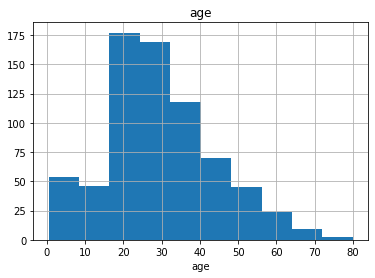

In [32]:
num_summary(df, "age", plot= True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


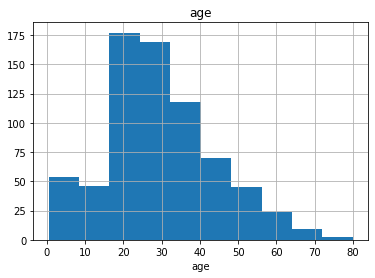

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: fare, dtype: float64


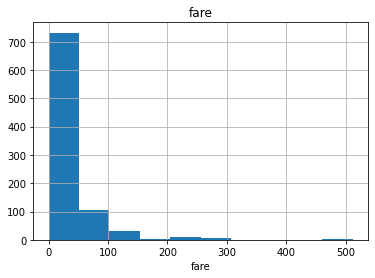

In [33]:
for col in num_cols:
    num_summary(df, col, plot=True)